In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from os import name
import datetime, os

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

2024-04-15 11:53:57.651468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 11:53:57.651620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 11:53:57.807903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [2]:
# drop 'customerID'
df = df.drop(columns='customerID', axis=1)

In [3]:
# change to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# change to binary
map_dict = {'No': 0, 'No phone service':0, 'No internet service':0, 'Yes': 1, 'Male': 1, 'Female': 0}
df = df.applymap(lambda x: map_dict.get(x) if x in map_dict else x)

# change to One Hot
cat_cols = ['InternetService','Contract','PaymentMethod' ]
df =  pd.get_dummies(df, columns=cat_cols)
df.head()

/tmp/ipykernel_18/3164168169.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: map_dict.get(x) if x in map_dict else x)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_0  InternetService_DSL  InternetService_Fiber optic  \
0              False                 True                        False   
1              False                 True                        False   
2              False                 True                        False   
3              False                 True                        False   
4              False                False                         True   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True              False   
2                     True              False              False   
3                    False               True              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 27 columns]

In [4]:
# drop nan values
df = df.dropna()
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_0  InternetService_DSL  InternetService_Fiber optic  \
0              False                 True                        False   
1              False                 True                        False   
2              False                 True                        False   
3              False                 True                        False   
4              False                False                         True   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True              False   
2                     True              False              False   
3                    False               True              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 27 columns]

In [5]:
# standarize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns='Churn'))

In [6]:
# split data
X = df_scaled
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=4)
X_train.shape

(3445, 26)

In [7]:
# NN model
learning_rate = 0.01
patience = 20
dropout_rate = 0.2

model_NN12 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(2, activation='softmax', name='output')
])

model_NN12.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

In [8]:
# define callback objects (TensorBoard and EarlyStopping)
ts = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(
    "logs", f"telco{learning_rate}_do{dropout_rate}_p{patience}{ts}"
)
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir, profile_batch=(100, 200))

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=patience, restore_best_weights=True
)

In [9]:
# fit model
model_NN12.fit(X_train, y_train, epochs=40,
          validation_data = (X_val, y_val),
          callbacks= [tensorboard_cb, early_stopping_cb])

Epoch 1/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6988 - loss: 0.6427 - val_accuracy: 0.7915 - val_loss: 0.6094
Epoch 2/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7865 - loss: 0.4497 - val_accuracy: 0.7949 - val_loss: 0.4497
Epoch 3/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7920 - loss: 0.4349 - val_accuracy: 0.8003 - val_loss: 0.4259
Epoch 4/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8043 - loss: 0.4338 - val_accuracy: 0.8070 - val_loss: 0.4188
Epoch 5/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7879 - loss: 0.4507 - val_accuracy: 0.7989 - val_loss: 0.4522
Epoch 6/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8004 - loss: 0.4300 - val_accuracy: 0.7962 - val_loss: 0.4299
Epoch 7/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8080 - loss: 0.4113 - val_accuracy: 0.8037 - val_loss: 0.4224
Epoch 8/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7857 - loss: 0.4323 - val_acc

In [10]:
%load_ext tensorboard

In [11]:
%tensorboard --logdir logs

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


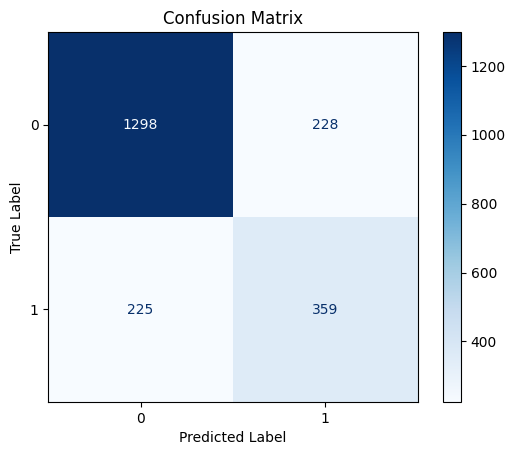

In [12]:
# evaluate model
y_pred_probs = model_NN12.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# model accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7853
